Task: Perform Text Classification on the data

Table of content 
1. import libraries
2. import Dataset 
3. EDA 
4. Split dataset into train and test subsets 
5. Tokenize Words
6. Build and Evaluate model 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
# import dataset
topic_data = pd.read_csv('bbc-text.csv')
topic_data

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [3]:
# check data types
topic_data.dtypes

category    object
text        object
dtype: object

In [4]:
# check for missing values
topic_data.isnull().sum()

category    0
text        0
dtype: int64

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


<AxesSubplot:xlabel='category', ylabel='count'>

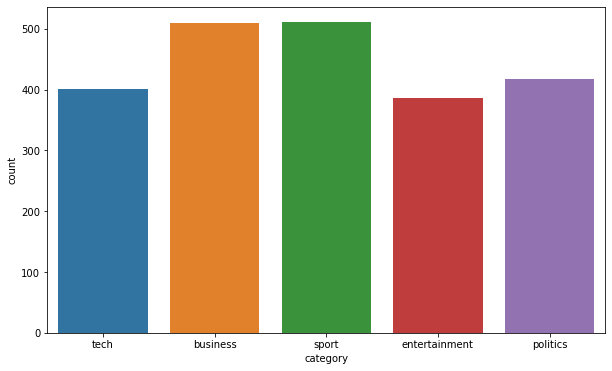

In [5]:
# check value count for dependent column category
print(topic_data.category.value_counts())
plt.figure(figsize=(10,6))
sns.countplot(topic_data['category'])

In [6]:
# split data into train and test subsets part1 
train_size = int(len(topic_data) * .8)
print('Train:', train_size)
print('Test:', (len(topic_data))- train_size)

Train: 1780
Test: 445


In [7]:
# split data into train and test subsets part2 
train_text = topic_data['text'][:train_size]
train_category = topic_data['category'][:train_size]

test_text = topic_data['text'][train_size:]
test_category = topic_data['category'][train_size:]

In [8]:
V_S = 10000 
embedding_dim = 20 # embedding dimensions 
max_length = 150 # max length in each sequences
OOV = "<OOV>"

tokenizer = Tokenizer(oov_token=OOV, num_words = V_S) # tokenize up to 10000 most common words
                                            # oov_token = words not on the the trianing set 
tokenizer.fit_on_texts(train_text)
# fit tokenizer on trainingtext set 
sequences = tokenizer.texts_to_sequences(train_text)
train_text_padded = pad_sequences(sequences, padding='post', maxlen=max_length) 

# tokenizer on test_text set
test_text = tokenizer.texts_to_sequences(test_text)
text_text_padded = pad_sequences(test_text, maxlen=max_length)

In [9]:
# tokenize category column 
category = topic_data['category']
category_tokenizer = Tokenizer()
category_tokenizer.fit_on_texts(category)

train_category1 = np.array(category_tokenizer.texts_to_sequences(train_category))
test_category1 = np.array(category_tokenizer.texts_to_sequences(test_category))

In [11]:
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(V_S, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 20)           200000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                504       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 200,654
Trainable params: 200,654
Non-trainable params: 0
_________________________________________________________________


2021-10-08 15:35:15.862793: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [12]:
# train model, validate using test set 
num_epochs = 100
batch = 32
history = model.fit(train_text_padded, train_category1, epochs=num_epochs, batch_size = batch, 
                verbose=2, validation_data=(text_text_padded, test_category1))

2021-10-08 15:35:16.008218: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
56/56 - 2s - loss: 1.7488 - accuracy: 0.2421 - val_loss: 1.6954 - val_accuracy: 0.2382
Epoch 2/100
56/56 - 0s - loss: 1.6379 - accuracy: 0.2691 - val_loss: 1.5802 - val_accuracy: 0.3528
Epoch 3/100
56/56 - 0s - loss: 1.5040 - accuracy: 0.4343 - val_loss: 1.4418 - val_accuracy: 0.4517
Epoch 4/100
56/56 - 0s - loss: 1.3223 - accuracy: 0.4927 - val_loss: 1.2524 - val_accuracy: 0.5551
Epoch 5/100
56/56 - 0s - loss: 1.0994 - accuracy: 0.6730 - val_loss: 1.0508 - val_accuracy: 0.7011
Epoch 6/100
56/56 - 0s - loss: 0.8832 - accuracy: 0.7921 - val_loss: 0.8666 - val_accuracy: 0.7708
Epoch 7/100
56/56 - 0s - loss: 0.6919 - accuracy: 0.8528 - val_loss: 0.7165 - val_accuracy: 0.8607
Epoch 8/100
56/56 - 0s - loss: 0.5332 - accuracy: 0.9382 - val_loss: 0.5899 - val_accuracy: 0.8921
Epoch 9/100
56/56 - 0s - loss: 0.4060 - accuracy: 0.9618 - val_loss: 0.4928 - val_accuracy: 0.9101
Epoch 10/100
56/56 - 0s - loss: 0.3095 - accuracy: 0.9725 - val_loss: 0.4219 - val_accuracy: 0.9124
Epoch 11/

56/56 - 0s - loss: 3.2566e-04 - accuracy: 1.0000 - val_loss: 0.1542 - val_accuracy: 0.9438
Epoch 83/100
56/56 - 0s - loss: 3.1230e-04 - accuracy: 1.0000 - val_loss: 0.1541 - val_accuracy: 0.9438
Epoch 84/100
56/56 - 0s - loss: 2.9959e-04 - accuracy: 1.0000 - val_loss: 0.1543 - val_accuracy: 0.9438
Epoch 85/100
56/56 - 0s - loss: 2.8748e-04 - accuracy: 1.0000 - val_loss: 0.1543 - val_accuracy: 0.9438
Epoch 86/100
56/56 - 0s - loss: 2.7594e-04 - accuracy: 1.0000 - val_loss: 0.1543 - val_accuracy: 0.9461
Epoch 87/100
56/56 - 0s - loss: 2.6502e-04 - accuracy: 1.0000 - val_loss: 0.1542 - val_accuracy: 0.9461
Epoch 88/100
56/56 - 0s - loss: 2.5450e-04 - accuracy: 1.0000 - val_loss: 0.1545 - val_accuracy: 0.9438
Epoch 89/100
56/56 - 0s - loss: 2.4431e-04 - accuracy: 1.0000 - val_loss: 0.1547 - val_accuracy: 0.9461
Epoch 90/100
56/56 - 0s - loss: 2.3479e-04 - accuracy: 1.0000 - val_loss: 0.1546 - val_accuracy: 0.9461
Epoch 91/100
56/56 - 0s - loss: 2.2560e-04 - accuracy: 1.0000 - val_loss: 0.1

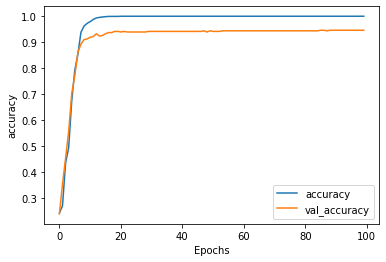

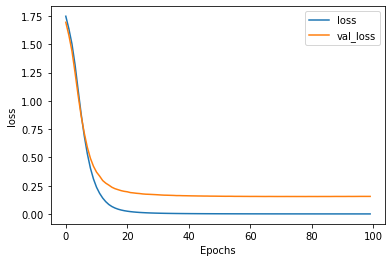

In [13]:
# graph accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")